# Spatiotemporal CNN-RNN Proxy Model for CO2 Monitoring
### Misael M. Morales, 2023
***

In [1]:
from utils import *
check_tensorflow_gpu()

proxy = SpatiotemporalCO2()

c:\Users\Misael Morales\miniconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Misael Morales\miniconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you 

... Checking Tensorflow Version ...
Tensorflow built with CUDA? True
TF: 2.10.0 | CUDA: 64_112 | cuDNN: 64_8
# GPU available: 1 (NVIDIA GeForce RTX 3080)


{'input_features_dir': 'simulations2D/input_features',
 'output_targets_dir': 'simulations2D/output_targets',
 'x_data_labels': ['Poro', 'LogPerm', 'Facies', 'Wells'],
 'y_data_labels': ['Pressure', 'Saturation'],
 'return_data': False,
 'save_model': False,
 'n_realizations': 1000,
 'x_channels': 4,
 'y_channels': 2,
 'timesteps': 60,
 'dim': 64,
 'test_size': 0.25,
 't_samples': [0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60],
 'cnn_filters': [16, 64, 256],
 'rnn_filters': [256, 64, 16],
 'rnn_dropout': 0.2,
 'up_interpol': 'bilinear',
 'optimizer': <tensorflow_addons.optimizers.weight_decay_optimizers.AdamW at 0x1f198392da0>,
 'criterion': <bound method SpatiotemporalCO2.custom_loss of <utils.SpatiotemporalCO2 object at 0x000001F1BF2556F0>>,
 'L1L2_split': 0.25,
 'ridge_alpha': 0.7,
 'regular': <keras.regularizers.L1 at 0x1f198b71060>,
 'leaky_slope': 0.25,
 'num_epochs': 200,
 'batch_size': 50,
 'lr_decay': 15,
 'verbose': 0}

In [2]:
proxy.load_data()
proxy.process_data()

X: (1000, 64, 64, 4) | y: (1000, 60, 64, 64, 2)
Data Augmentation Done! - n_samples=2,000
MinMax Normalization Done! - [0.0, 1.0]
Train - X: (1500, 64, 64, 4) | y: (1500, 11, 64, 64, 2)
Test  - X: (500, 64, 64, 4) | y: (500, 11, 64, 64, 2)


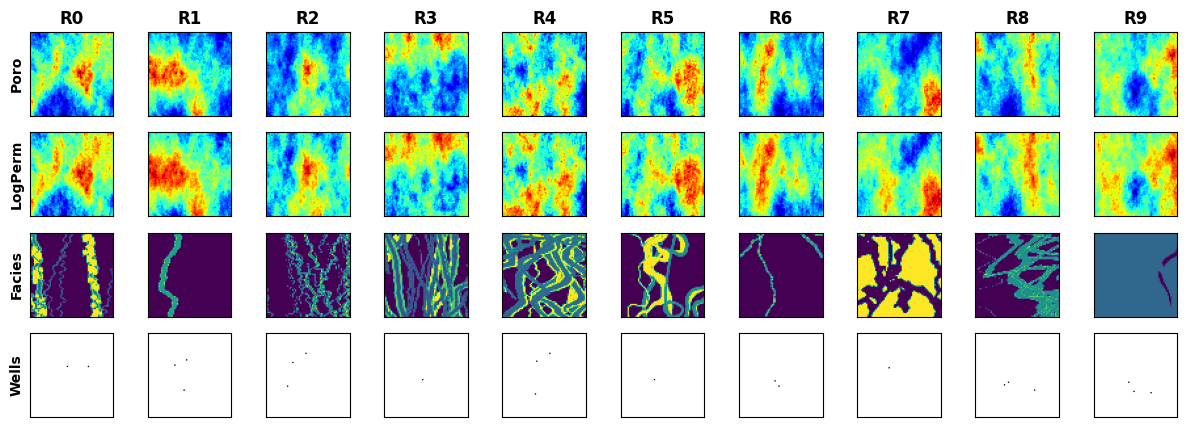

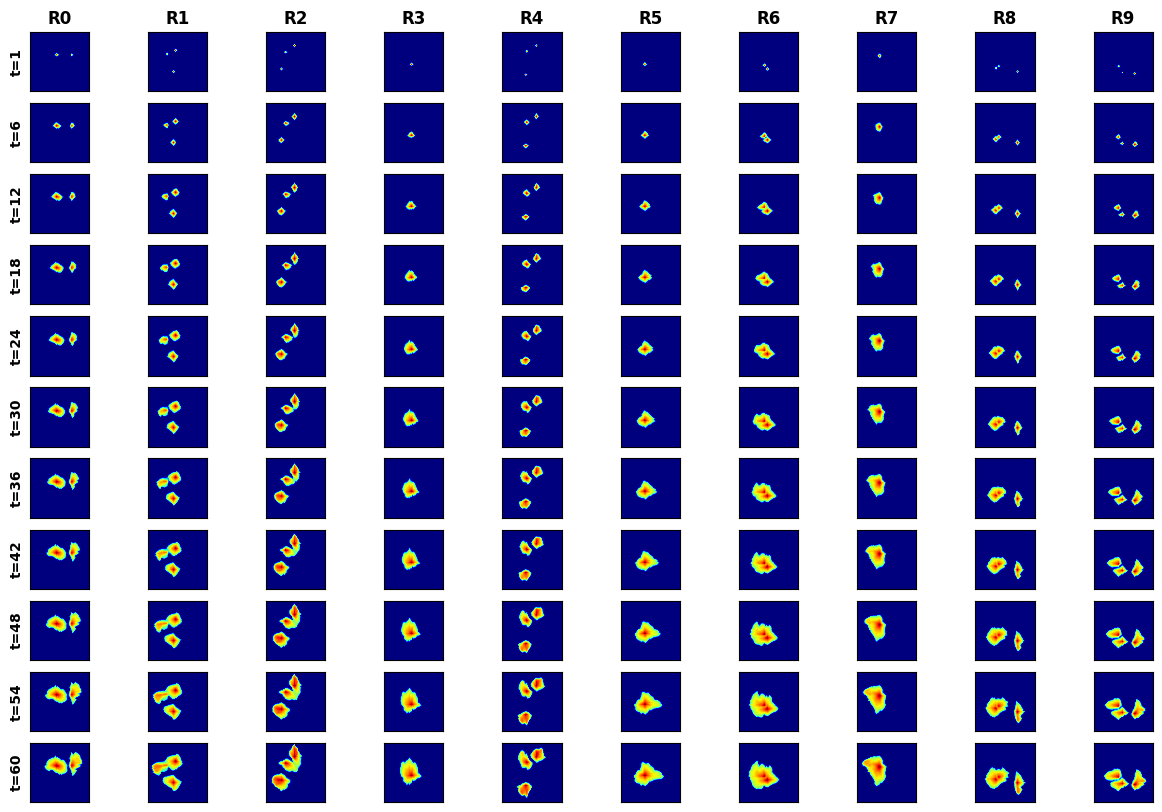

In [3]:
proxy.plot_features()

proxy.plot_targets()

In [4]:
proxy.make_model()

In [5]:
proxy.model.summary()

Model: "CNN_RNN_Proxy"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 separable_conv2d (SeparableCon  (None, 64, 64, 16)  216         ['input_1[0][0]']                
 v2D)                                                                                             
                                                                                                  
 squeeze_excite (SqueezeExcite)  (None, 64, 64, 16)  148         ['separable_conv2d[0][0]']       
                                                                                                  
 instance_normalization (Instan  (None, 64, 64, 16)  32          ['squeeze_excite[0][0

In [ ]:
proxy.training()

In [ ]:
proxy.predictions()

In [ ]:
proxy.latent_space()

In [ ]:
proxy.plot_single_results(42, 'train')

In [ ]:
proxy.cumulative_co2()

***
# END